# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,count,sum,ratio
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


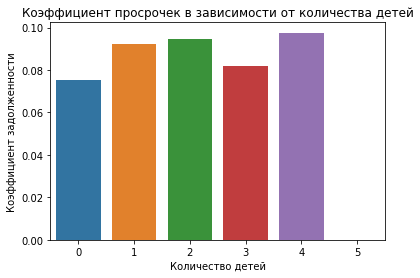

In [22]:
import seaborn
data_pivot = data.pivot_table(index = ['children'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot['ratio'] = data_pivot['sum'] / data_pivot['count']
data_pivot = data_pivot.sort_values(by = 'ratio', ascending = False)
display(data_pivot)
seaborn.barplot(x = data_pivot.index, \
                 y = data_pivot['ratio']).set(xlabel='Количество детей', \
                                              ylabel='Коэффициент задолженности',\
                                              title='Коэффициент просрочек в зависимости от количества детей');

In [23]:
##Комментарий ревьюера

data_children = data.pivot_table(index = ['children'], values = 'debt', aggfunc = {'count', 'sum', 'mean'})
data_children = data_children[['count', 'sum', 'mean']].reset_index()
data_children 

,children,count,sum,mean
0,0,14091.0,1063.0,0.075438
1,1,4808.0,444.0,0.092346
2,2,2052.0,194.0,0.094542
3,3,330.0,27.0,0.081818
4,4,41.0,4.0,0.097561
5,5,9.0,0.0,0.000000


**Вывод:** Прослеживается незначительная зависимость количества детей и неоплаченных кредитов. Выборка по категориям людей с количеством детей от 3 до 5 не репрезентативна и её нельзя учитывать. В связи с исключениям указанных данных можно сделать вывод, что люди с детьми менее охотно отдают кредиты. В случае наличия одного ребенка доля должников  составляет 9,2%, хуже обстоит дело с должниками, кто имеет двух детей, здесь доля невозврата составляет 9,4%. Заёмщики без детей имеют наименьший процент невозврата денежных средств - 7,5%.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,count,sum,ratio
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


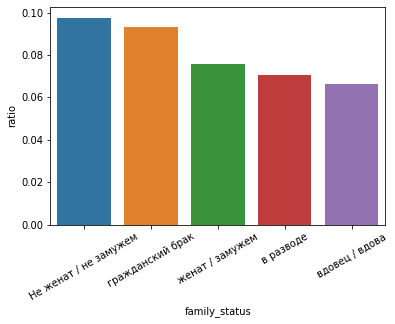

In [24]:
data_pivot_fam = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_fam['ratio'] = data_pivot_fam['sum'] / data_pivot_fam['count']
data_pivot_fam = data_pivot_fam.sort_values(by = 'ratio', ascending = False)
display(data_pivot_fam)
table = seaborn.barplot(x = data_pivot_fam.index, y = data_pivot_fam['ratio'])
table.set_xticklabels(table.get_xticklabels(),rotation = 30);

**Вывод:**  Люди в браке лучше всего отдают кредиты, доля должников здесь составляет с 7,5%. Пары проживающие в гражданском браке или люди, которые никогда не состояли в браке являются самыми неблагонадёжными заёмщиками. Процент просрочек по данным категориям составляет 9,3% и 9.7% соответственно.
Прослеживается зависимость между личной жизнью и степенью возврата заёмных средств. Женатые люди имеют большее постоянство, возможно на это влияет также возраст заёмщика, уровень их доходов как семьи. Остальные категории некорректно сравнивать, так как представленная выборка покажет недостоверные результаты в связи с большой разницей в данных.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,count,sum,ratio
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


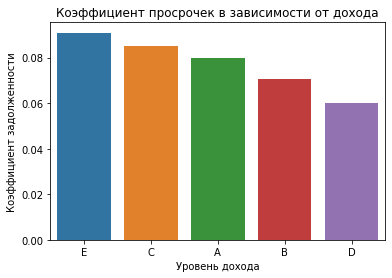

In [25]:
data_pivot_income = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_income['ratio'] = data_pivot_income['sum'] / data_pivot_income['count']
data_pivot_income = data_pivot_income.sort_values(by = 'ratio', ascending = False)
display(data_pivot_income)
seaborn.barplot(x = data_pivot_income.index, \
                y = data_pivot_income['ratio']).set(xlabel='Уровень дохода', \
                                                     ylabel='Коэффициент задолженности',\
                                                     title='Коэффициент просрочек в зависимости от дохода');

**Вывод:** Взяв во внимание несбалансированность выборки и исключив категории E,A и D можно сделать вывод, что самыми надёжными заёмщиками являются люди с доходом от 200 тысяч до 1 миллиона. Финансовые возможности данной категории лиц позволяют им платить вовремя. В тоже время они допускают просрочки скорее по невнимательности или по форс-мажорным обстоятельствам. Просроченные платежи составляют 7%. В свою очередь, согласно представленным данным менее обеспеченная категория лиц с доходом уровня C (от 50 000 до 200 000) имеет наивысший процент просроченных платежей в размере 8,5%. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,count,sum,ratio
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


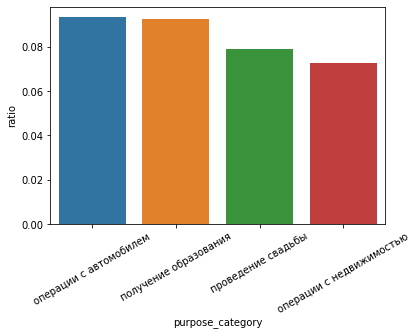

In [26]:
data_pivot_purpose = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_purpose['ratio'] = data_pivot_purpose['sum'] / data_pivot_purpose['count']
data_pivot_purpose = data_pivot_purpose.sort_values(by = 'ratio', ascending = False)
display(data_pivot_purpose)
tabel_purpose = seaborn.barplot(x = data_pivot_purpose.index, y = data_pivot_purpose['ratio'])
tabel_purpose.set_xticklabels(tabel_purpose.get_xticklabels(),rotation = 30);

**Вывод:** Люди, которые берут ипотеку допускают меньше просрочек. Это связано с тем, что кредит долгосрочный и сумма кредита в разы превышает уровень дохода. В таком случае возникновение просрочек сильно увчеличит сумму кредитования и платежи.
Покупка автотранспорта или получение образование несёт в себе дополнительные риски. В случае автомобиля это могут быть непредвиденные расходы на его содержание или же попадание в ДТП. Также можно отнести получение образование - нехватка времени, отчисление из образовательной организации или же другие причины, которые влияют на мотивацию по возврату кредитных средств. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В исходных данных были обнаружены пропуски в столбцах 'total_income' и 'days_employed'. Причина пропусков в данных может заключаться в некорректном заполнении анкеты или же человек сам не захотел предоставлять данную информацию. Так как количество пропусков в указанных колонках совпадает, то возможна гипотеза о связи между рабочим стажем и доходом. Например, без указания одного параметра, второй нельзя указать или также не указывается. В других колонках отсутствуют пропуски, следовательно некорректная выгрузка данных не может стать причиной пропусков.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение подходит лучше чем среднее значение в случае наличия пропусков данных. Так как среднее арифметическое значение будет некорректно посчитано в связи с рабросом данных.

### Шаг 4: общий вывод.

# В ходе проделанной работы можно сделать следующие выводы:

Прослеживаются зависимости между количеством детей, семейным положением, финансовым состоянием клиента и целями кредита. Люди с детьми менее охотно отдают кредиты. В случае наличия одного ребенка доля должников составляет 9,2%, хуже обстоит дело с должниками, кто имеет двух детей, здесь доля невозврата составляет 9,4%. Заёмщики без детей имеют наименьший процент невозврата денежных средств - 7,5%

Люди в браке лучше всего отдают кредиты, доля должников здесь составляет с 7,5%. Пары проживающие в гражданском браке или люди, которые никогда не состояли в браке являются самыми неблагонадёжными заёмщиками. Процент просрочек по данным категориям составляет 9,3% и 9.7% соответственно.

Клиенты с доходом от 200 тысяч до 1 миллиона, финансовые возможности которых позволяют им платить вовремя, имеют наименьший процент просроченных платежей. Неоплата в срок наблюдается у 7% заёмщиков. В свою очередь, согласно представленным данным менее обеспеченная категория лиц с доходом уровня C (от 50 000 до 200 000) имеет наивысший процент просроченных платежей в размере 8,5%.

Заёмщики с основной целью ипотечного кредитования стараются не допускать просрочек по обязательствам. Кореляция количества ипотечных кредитов и неоплатой кредитных обязательств в 0.072551 (7,2%) показывает наибольшую возвратность средств. Это связано с тем, что кредит долгосрочный и сумма кредита в разы превышает уровень дохода. В таком случае возникновение просрочек сильно увеличит сумму кредитования и платежи. Покупка автотранспорта или получение образование, как и кредитование не небольшие суммы несут в себе дополнительные риски. Так в случае покупки автомобиля 9,3% заёмщиков допускают неоплату обязательств, что существенно сказывается на банке.

В случае кредитования физических лиц особое внимание следует уделить семьям с детьми или не женатым, которые планируют покупку автомобиля так как они несут наибольшие риски по невозврату заёмных средств.

# Рекомендации для банка:

1. Необходимо скорректировать анкету на кредитование с обязательным указанием дохода и рабочего стажа для дальнейшего исключения пропуска данных, так как эти два пункта являются важнейшим основанием для возможности рассмотрения кредитной заявки.
2. Добавить в кредитную заявку возраст заёмщика, это поможет скорректировать сумму и срок кредита, что в свою очередь улучшит процесс скоринга и повысит возвратность кредитных средств.
3. Исключить возможность подачи заявки в случае наличия отрицательных или ложных значений, как это было в предоставленных данных с трудовым стажем и количеством детей заёмщиков.
4. Перевести данные о трудовом стаже в месяцы или годы для удобства клиентов. Многие клиенты не знают сколько они проработали в днях за свою трудовую карьеру. Так в представленных данных стаж указан в днях с тысячными и милионными значениями после запятой (0,000001). Альтернативный вариант - сохранить стаж в днях в формате целых чисел с автоматическим подсчётом и переводом  из указанного заёмщиком годового формата.